<a href="https://colab.research.google.com/github/ajayaconnect/fedex-logistics-eda/blob/main/Fedex_Supplychain_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**FedEx Logistics Performance Analysis**


**Author: Ajaya Kumar Pradhan**

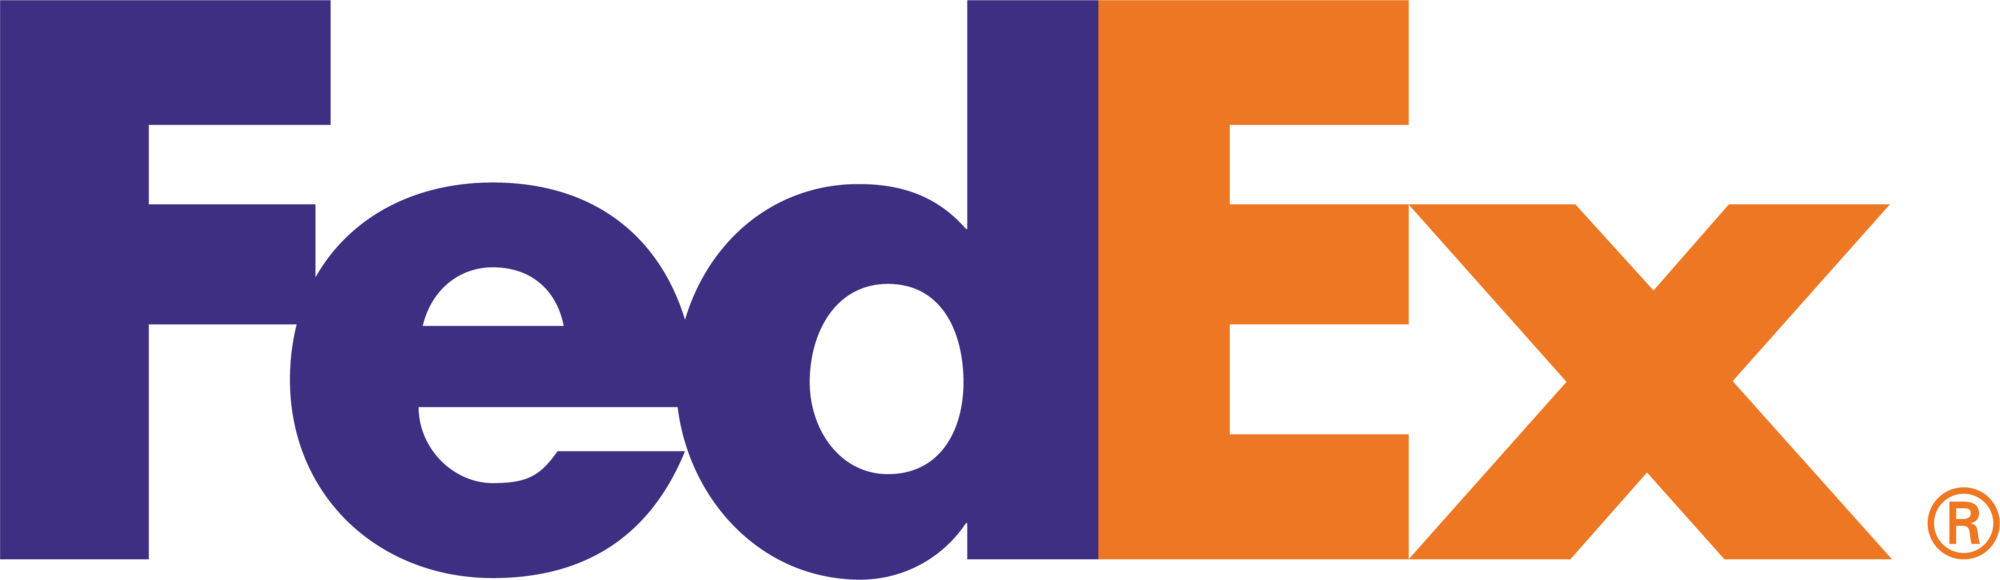

In [1]:
from IPython.display import Image, display

display(Image("/content/fedex-seeklogo.png", width=550))


###**Project Overview**

This project analyzed FedEx’s global shipment dataset to understand delivery performance, cost drivers, and logistics inefficiencies across vendors, countries, and shipment modes.

The goal was to uncover actionable insights to improve delivery reliability and reduce logistics cost.

In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [4]:
df = pd.read_csv("/content/SCMS_Delivery_History_Dataset.csv")
df.head()


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
df.shape

(10324, 33)

In [6]:
list(df.columns)

['ID',
 'Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [8]:
df.isna().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [11]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]


,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287


In [12]:
date_cols = [
    "PQ First Sent to Client Date",
    "PO Sent to Vendor Date",
    "Scheduled Delivery Date",
    "Delivered to Client Date",
    "Delivery Recorded Date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [13]:
df["Shipment Mode"].fillna("Unknown", inplace=True)
df["Dosage"].fillna("Not Applicable", inplace=True)
df["Line Item Insurance (USD)"].fillna(0, inplace=True)


In [14]:
output_dir = "eda_charts"
os.makedirs(output_dir, exist_ok=True)

def save_show_plot(filename):
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename))
    plt.show()
    plt.close()


In [15]:
df["Vendor Processing Time"] = (
df["PO Sent to Vendor Date"] - df["PQ First Sent to Client Date"]).dt.days

df["Shipping Duration"] = (
df["Delivered to Client Date"] - df["PO Sent to Vendor Date"]).dt.days

df["Delivery Delay"] = (
df["Delivered to Client Date"] - df["Scheduled Delivery Date"]).dt.days

df["Recording Delay"] = (
df["Delivery Recorded Date"] - df["Delivered to Client Date"]).dt.days

df["Delivery Status"] = np.where(df["Delivery Delay"]<=0,"On Time","Delayed")


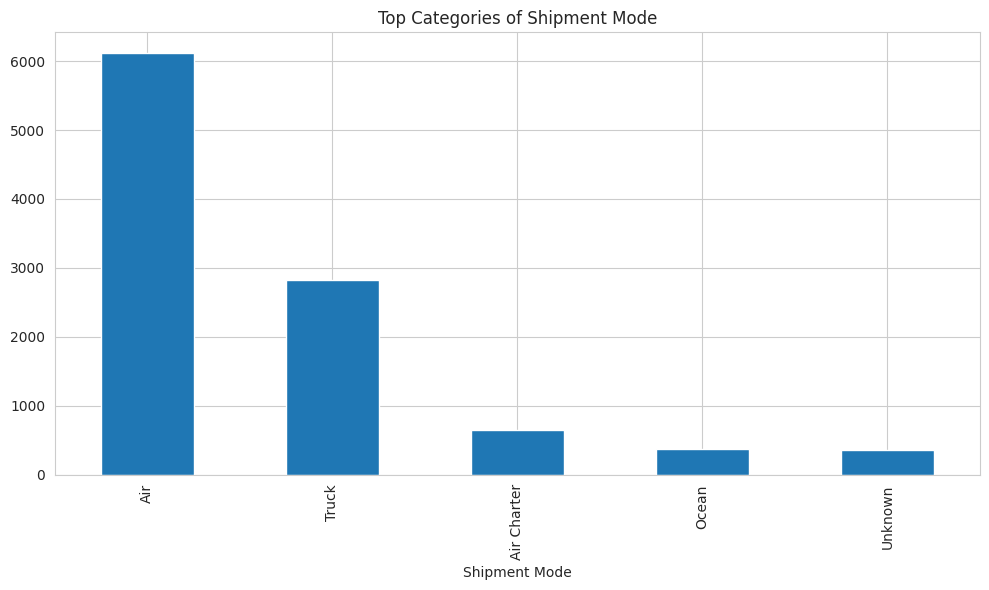

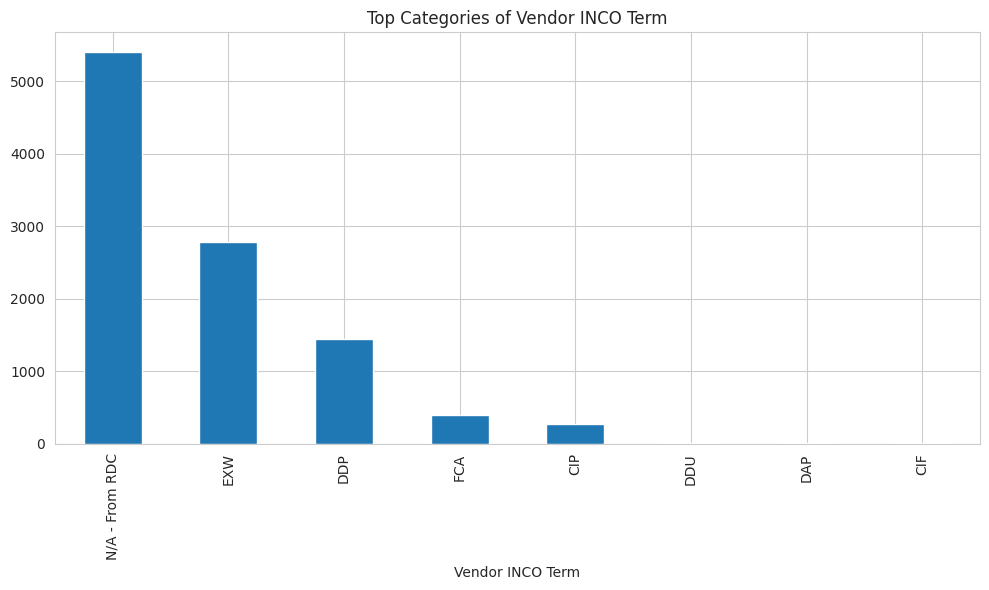

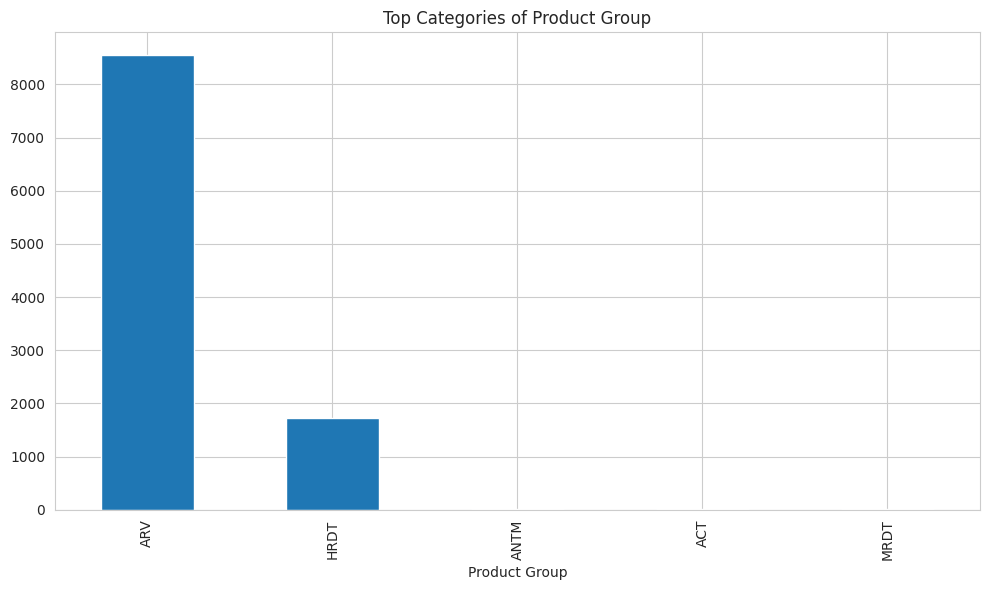

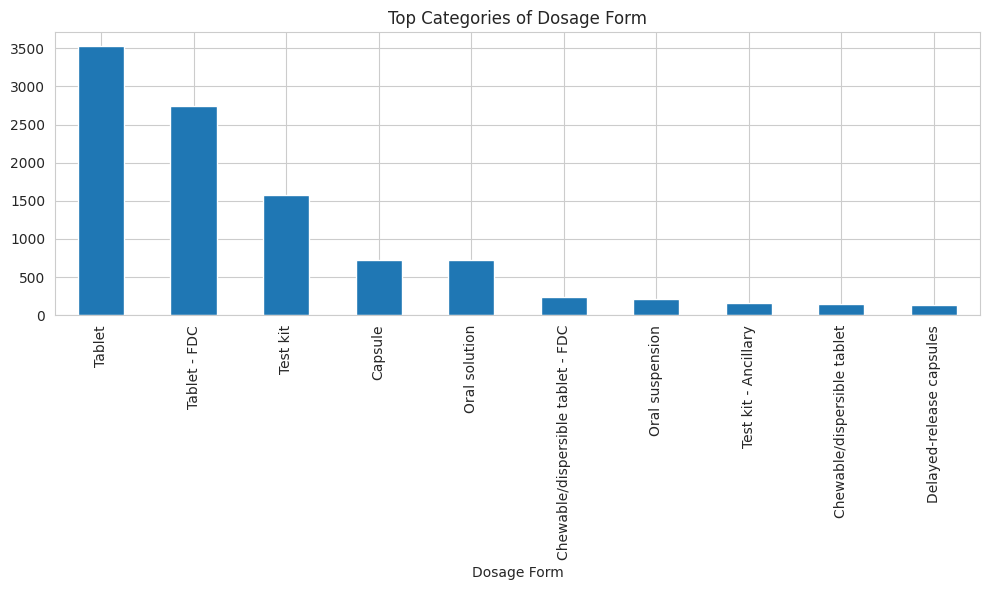

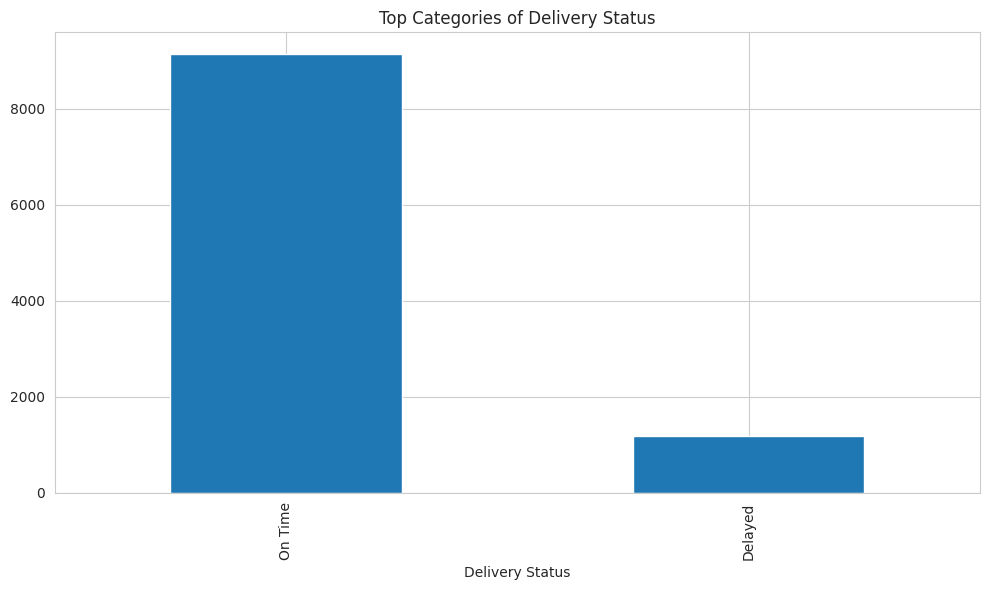

In [16]:
cat_cols = ["Shipment Mode","Vendor INCO Term","Product Group","Dosage Form","Delivery Status"]

for col in cat_cols:
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top Categories of {col}")
    save_show_plot(f"uni_cat_{col}.png")


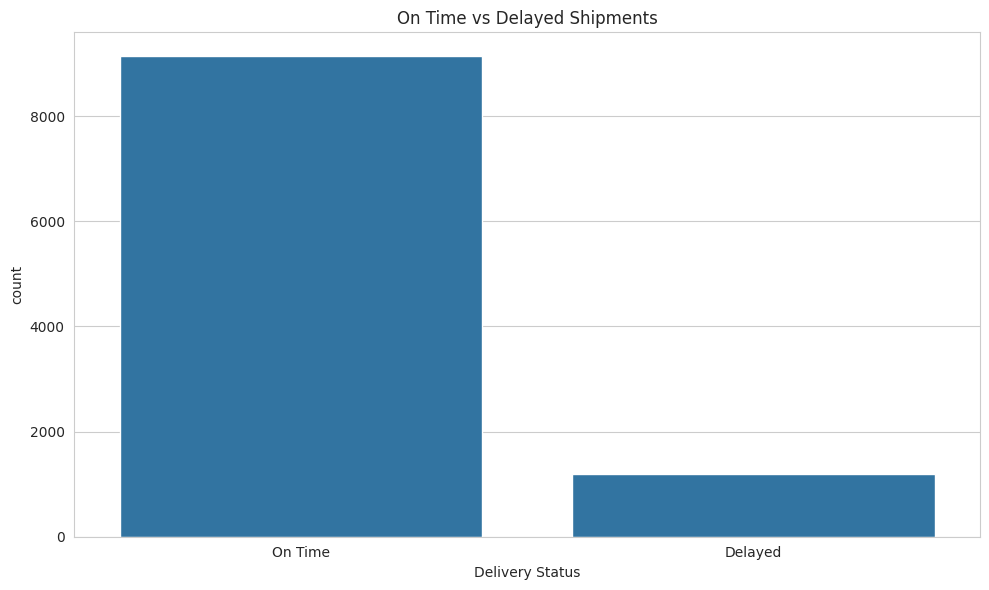

In [17]:
sns.countplot(x="Delivery Status", data=df)
plt.title("On Time vs Delayed Shipments")
save_show_plot("delivery_status.png")


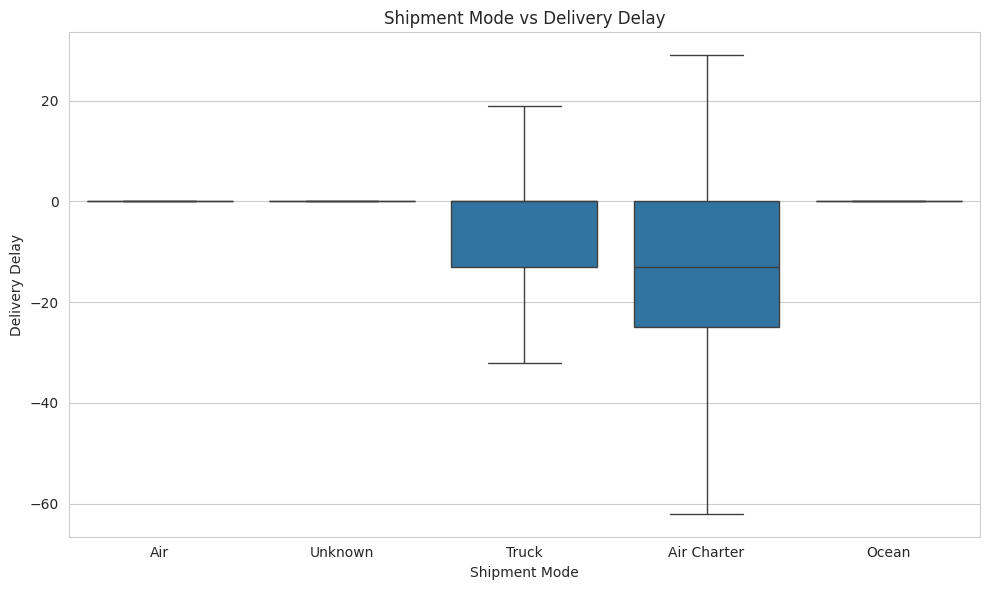

In [18]:
sns.boxplot(x="Shipment Mode", y="Delivery Delay", data=df, showfliers=False)
plt.title("Shipment Mode vs Delivery Delay")
save_show_plot("bi_delay_mode.png")


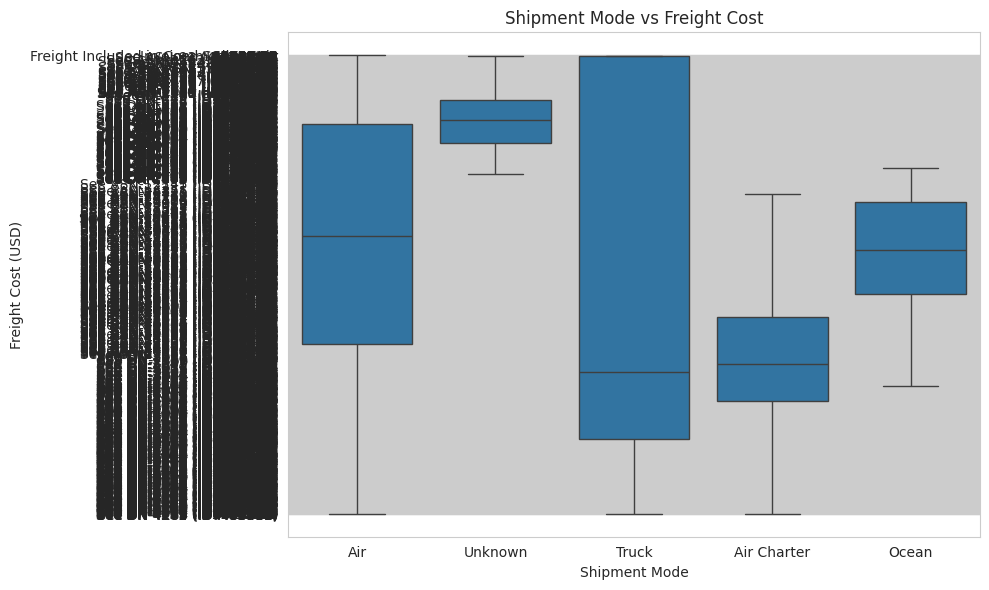

In [19]:
sns.boxplot(x="Shipment Mode", y="Freight Cost (USD)", data=df, showfliers=False)
plt.title("Shipment Mode vs Freight Cost")
save_show_plot("bi_cost_mode.png")


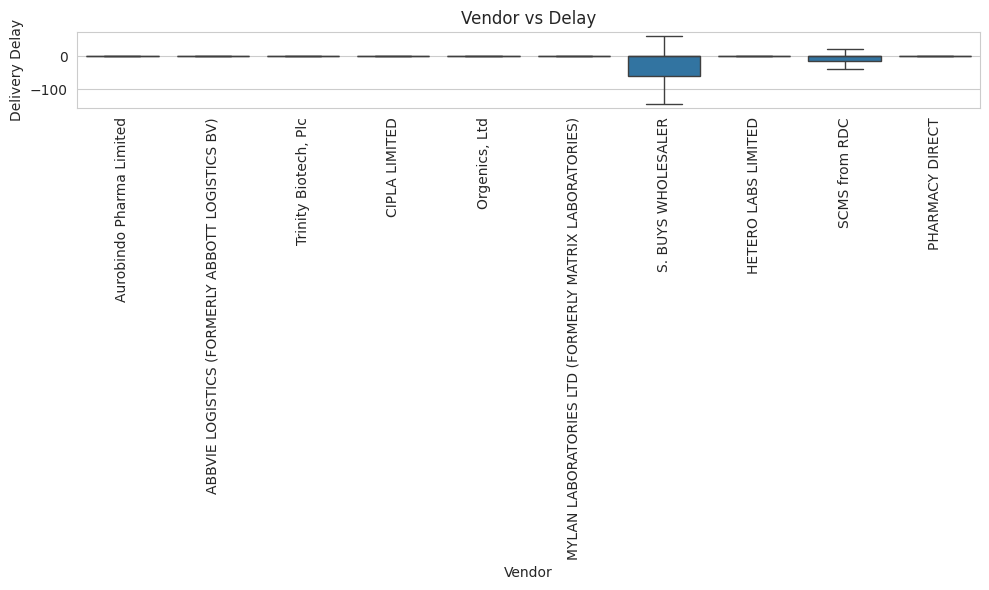

In [20]:
top_vendors = df["Vendor"].value_counts().nlargest(10).index

sns.boxplot(x="Vendor", y="Delivery Delay",
data=df[df["Vendor"].isin(top_vendors)], showfliers=False)
plt.xticks(rotation=90)
plt.title("Vendor vs Delay")
save_show_plot("bi_vendor_delay.png")


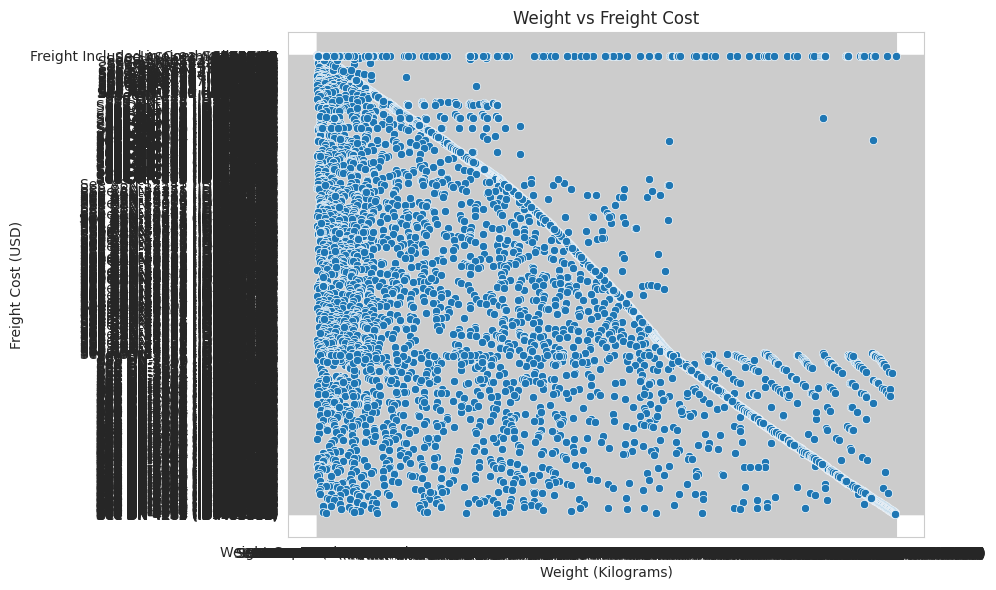

In [21]:
sns.scatterplot(x="Weight (Kilograms)", y="Freight Cost (USD)", data=df)
plt.title("Weight vs Freight Cost")
save_show_plot("bi_weight_cost.png")


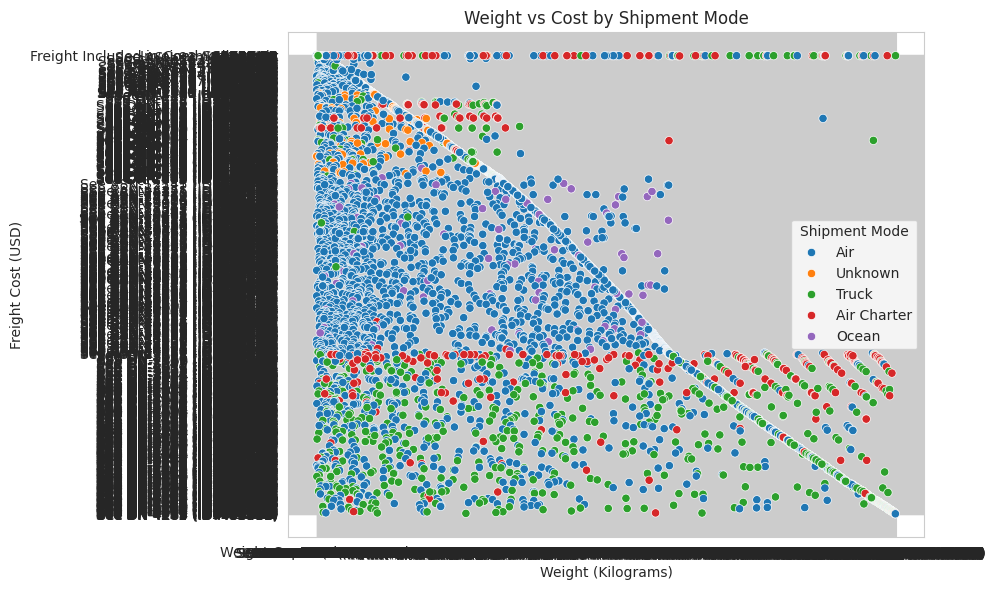

In [22]:
sns.scatterplot(x="Weight (Kilograms)", y="Freight Cost (USD)",
hue="Shipment Mode", data=df)
plt.title("Weight vs Cost by Shipment Mode")
save_show_plot("multi_weight_cost_mode.png")


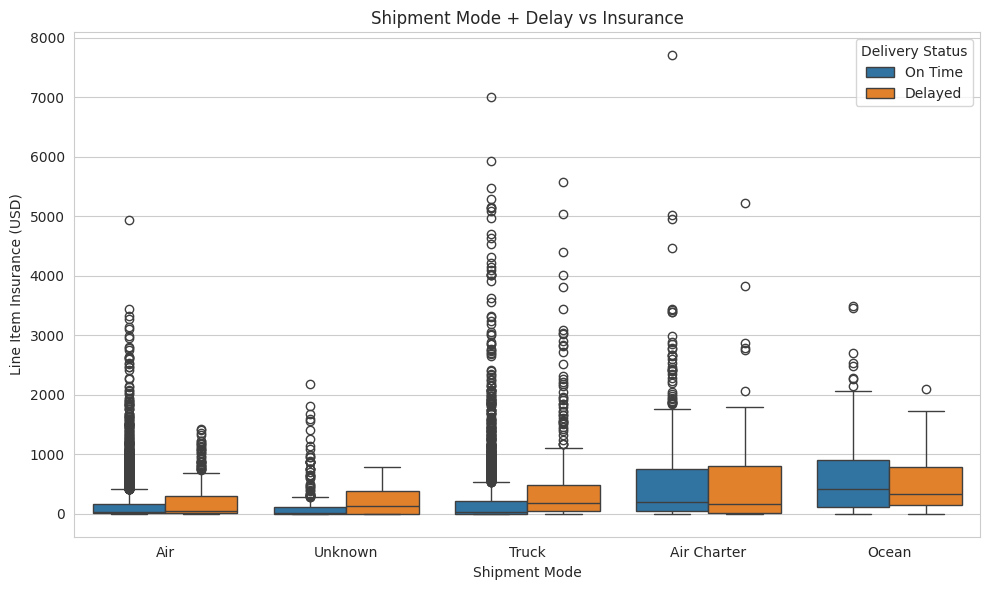

In [23]:
sns.boxplot(x="Shipment Mode", y="Line Item Insurance (USD)",
hue="Delivery Status", data=df)
plt.title("Shipment Mode + Delay vs Insurance")
save_show_plot("multi_mode_delay_insurance.png")


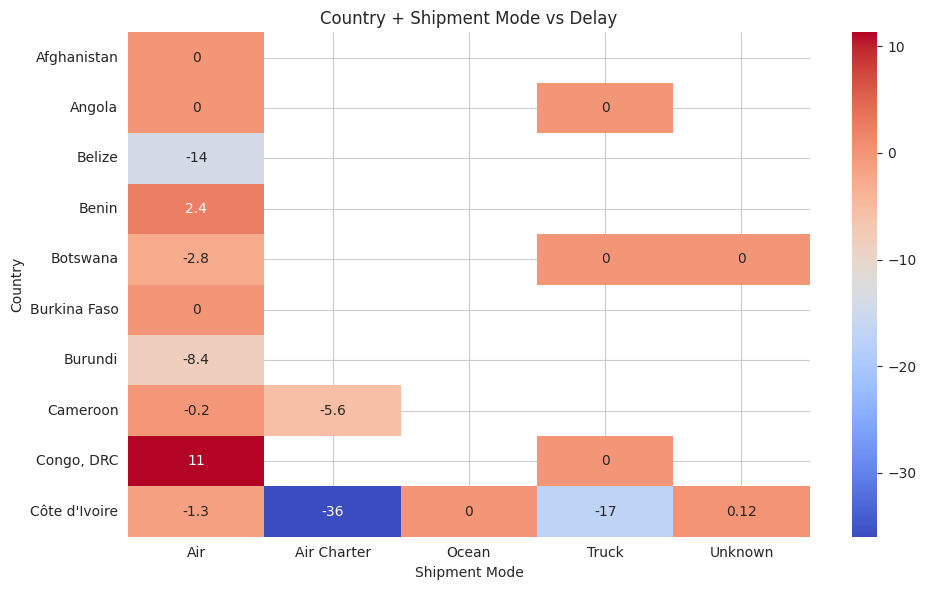

In [24]:
pivot = df.pivot_table(values="Delivery Delay",
index="Country", columns="Shipment Mode", aggfunc="mean")

sns.heatmap(pivot.head(10), cmap="coolwarm", annot=True)
plt.title("Country + Shipment Mode vs Delay")
save_show_plot("multi_country_mode_delay.png")


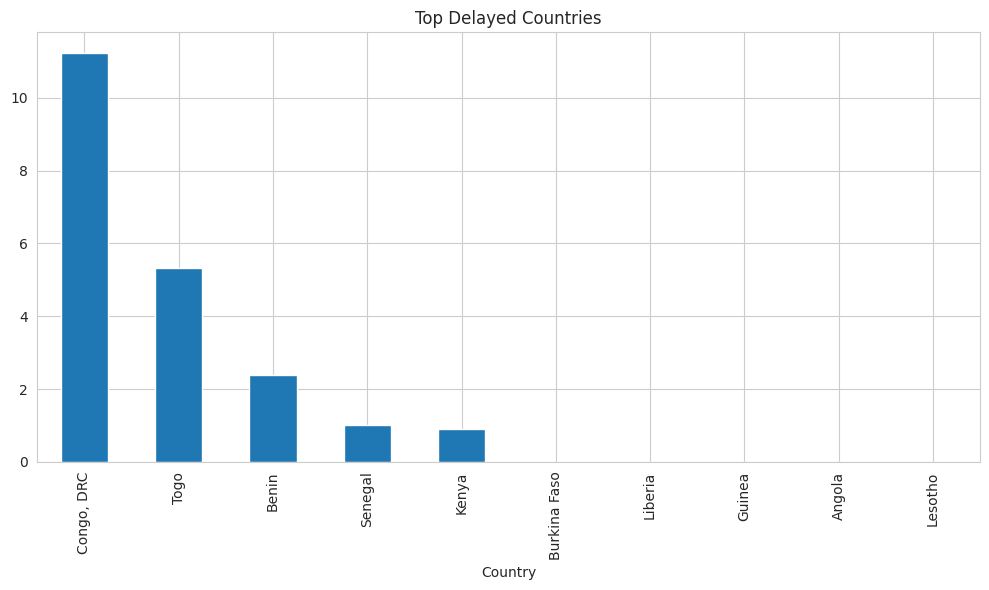

In [25]:
df.groupby("Country")["Delivery Delay"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top Delayed Countries")
save_show_plot("delay_country.png")


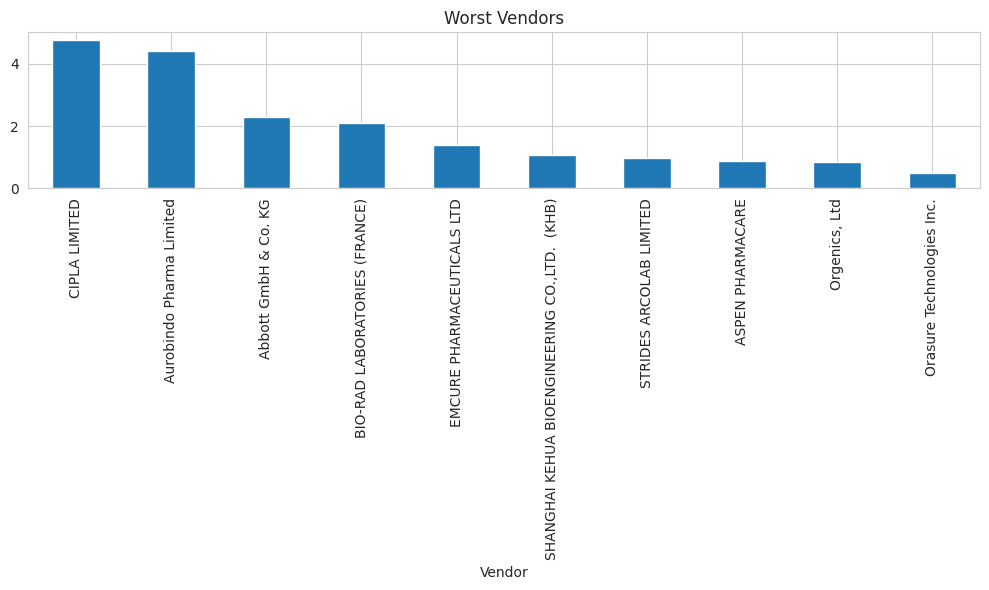

In [26]:
df.groupby("Vendor")["Delivery Delay"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Worst Vendors")
save_show_plot("delay_vendor.png")

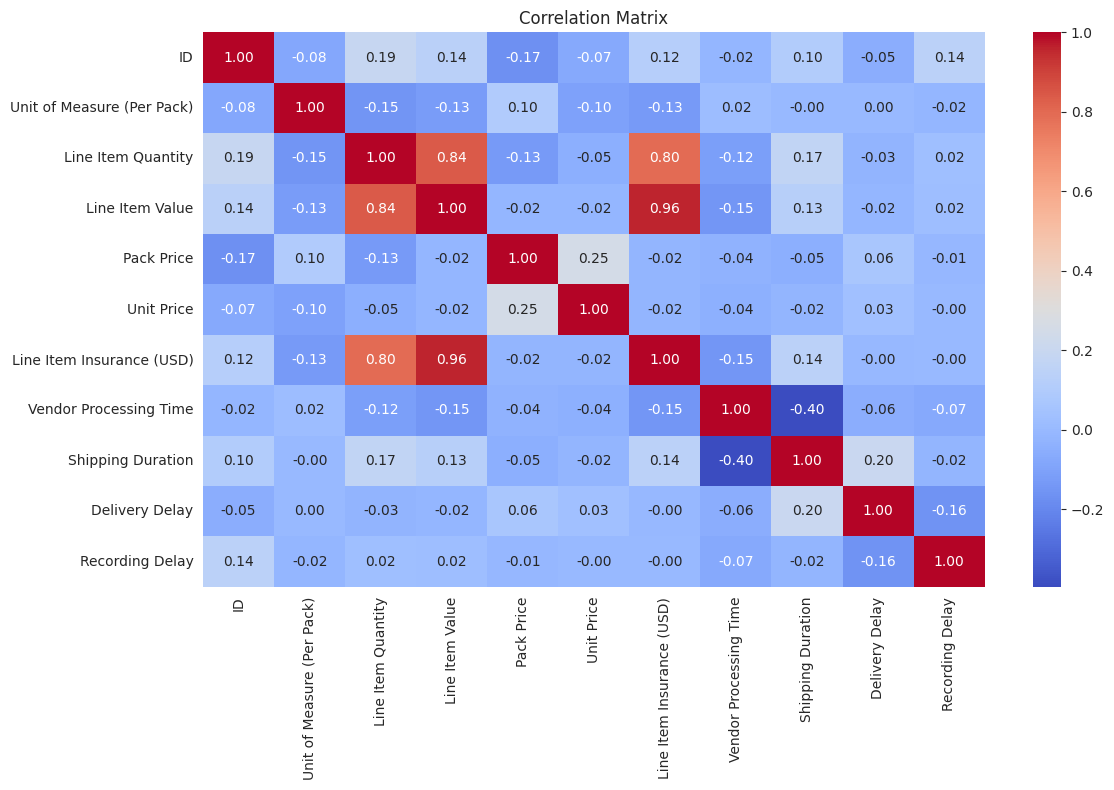

In [27]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
save_show_plot("correlation_matrix.png")


###**Key Results (High-Level Summary)**

###**Business Impact of Findings**

The analysis shows FedEx can improve by:

* Choosing shipment modes strategically

* Monitoring vendor performance

* Improving logistics in high-delay countries

* Reducing shipment weight through packaging optimization



###**Final Strategic Recommendations**

**Smart Shipment Strategy**

* Air → urgent healthcare shipments

* Ocean → bulk shipments

* Truck → regional deliveries

###**Vendor Performance Management**

* Introduce vendor KPIs & SLAs

* Audit consistently delayed vendors

###**Regional Logistics Improvement**

* Strengthen last-mile delivery in high-delay countries

* Improve customs & clearance processes

###**Cost Optimization**

* Consolidate shipments

* Reduce packaging weight